In [1]:
# Se importan algunas liberías útiles
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import style
import csv 
import pandas as pd

In [2]:
# Para leer la base de datos se importa desde un URL desde GitHub para mayor comodidad
Datos =  pd.read_csv('https://raw.githubusercontent.com/ErickHafid/Programation-and-DataScience/master/energydata_complete.csv') 
Datos

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [3]:
# Para filtrar los datos necesarios se utiliza la función drop()
# Se espera que la columna 'Appliances' sea función de las demás columnas
Valores = Datos.drop(['date', 'lights', 'rv1', 'rv2'], axis = 1)
Valores

# Normalización de los datos
Valores = (Valores - Valores.mean()) / Valores.std()
Valores

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,-0.367666,-1.118616,1.843774,-0.520398,1.073656,-1.235032,1.686087,-0.908194,1.506399,-1.314870,...,-1.957459,1.141543,-1.217293,0.958112,-0.152643,-2.976252,0.822060,1.207663,2.091543,0.366966
1,-0.367666,-1.118616,1.616766,-0.520398,1.057071,-1.235032,1.704523,-0.908194,1.604488,-1.314870,...,-1.957459,1.134525,-1.200748,0.965338,-0.174583,-2.962738,0.822060,1.071676,1.766539,0.343126
2,-0.465204,-1.118616,1.517921,-0.520398,1.033523,-1.235032,1.748563,-0.944091,1.580878,-1.314870,...,-1.957459,1.109004,-1.233838,0.950886,-0.196524,-2.949223,0.822060,0.935690,1.441535,0.319286
3,-0.465204,-1.118616,1.459284,-0.520398,1.024514,-1.235032,1.769047,-0.962039,1.542487,-1.314870,...,-2.008580,1.082206,-1.233838,0.926798,-0.218464,-2.935709,0.822060,0.799703,1.116531,0.295446
4,-0.367666,-1.118616,1.526298,-0.520398,1.009771,-1.235032,1.769047,-0.962039,1.497953,-1.296799,...,-2.008580,1.082206,-1.233838,0.926798,-0.240405,-2.922194,0.822060,0.663716,0.791527,0.271606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.022483,2.415901,1.583259,2.530254,0.394439,2.458683,0.590195,1.881979,1.511774,1.955897,...,1.365374,1.366260,1.843525,1.261617,2.881416,-0.043598,-1.616241,-0.288190,-1.243282,2.282105
19731,-0.075055,2.374391,1.568181,2.468238,0.407778,2.425451,0.608630,1.881979,1.511774,1.972161,...,1.365374,1.311899,1.843525,1.261617,2.856342,-0.043598,-1.593871,-0.220197,-1.172629,2.274158
19732,1.680617,2.374391,1.592473,2.411042,0.576968,2.383911,0.752018,1.881979,1.544022,1.972161,...,1.365374,1.287016,1.843525,1.261617,2.831267,-0.043598,-1.571502,-0.152204,-1.101976,2.266212
19733,3.143676,2.374391,1.691318,2.313197,0.642678,2.304155,0.629114,1.881979,1.557843,1.955897,...,1.346204,1.259979,1.843525,1.268241,2.806192,-0.043598,-1.549132,-0.084210,-1.031323,2.258265


In [4]:
# Separación de las variables independientes y la variable dependiente
ValoresX = Valores.drop(columns = ['Appliances'])
X = np.asarray(ValoresX)

Y = Valores['Appliances']
Y = np.asarray(Y)

In [5]:
# Parámetros
theta = np.arange(24) 
alpha = 0.001 # Parámetro de aprendizaje
iter = 10000
m = len(Y)

In [6]:
# MÉTODO IMPLEMENTADO 
# Función Costo
def FCosto(X, Y, theta):
    sumax = np.power((np.dot(X,theta.T)-Y),2)
    return np.sum(sumax)/(2 * len(X))

In [7]:
# Ciclo de aprendizaje
def DescGrad(X, Y, theta, alpha, iter): 
    Costo = np.zeros(iter)
    for i in range(iter):
        theta = theta - (alpha / m)*(np.dot(X,theta) - Y).dot(X)
        Costo[i] = FCosto(X, Y, theta)
    
    return theta, Costo

In [8]:
# Ejecutando el descenso por el gradiente y la función costo
g, Costo = DescGrad(X, Y, theta, alpha, iter)
print(g)
Costo_final = FCosto(X, Y, g)

[-3.8394776   0.91249857 -0.23652785 -2.58926985  0.01571503  2.70763894
  0.15909389 -1.34769312 -0.40601413  0.30309104  0.21751704  3.38200357
  0.63283285 -0.73012539  2.13093548 -0.94620299  3.15844201 -0.31296343
  5.91161548  0.61918619  3.32276566  0.63135709 -0.12034889 -2.81655621]


Text(0.5, 1.0, 'Minimización de la función Costo')

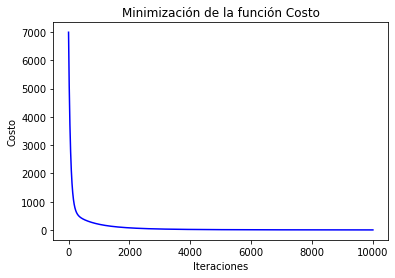

In [9]:
fig, ax = plt.subplots()  
ax.plot(np.arange(iter), Costo, 'b')  
ax.set_xlabel('Iteraciones')  
ax.set_ylabel('Costo')  
ax.set_title('Minimización de la función Costo')